# __This notebook will be used to investigate and implement different classification models using the iris data set__

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from collections import Counter



### __Loading data set__

In [24]:
IRIS_DATASET = pd.read_csv("iris data set\iris.csv")
iris_df = pd.DataFrame(IRIS_DATASET)
print(iris_df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### __Visualizing data__

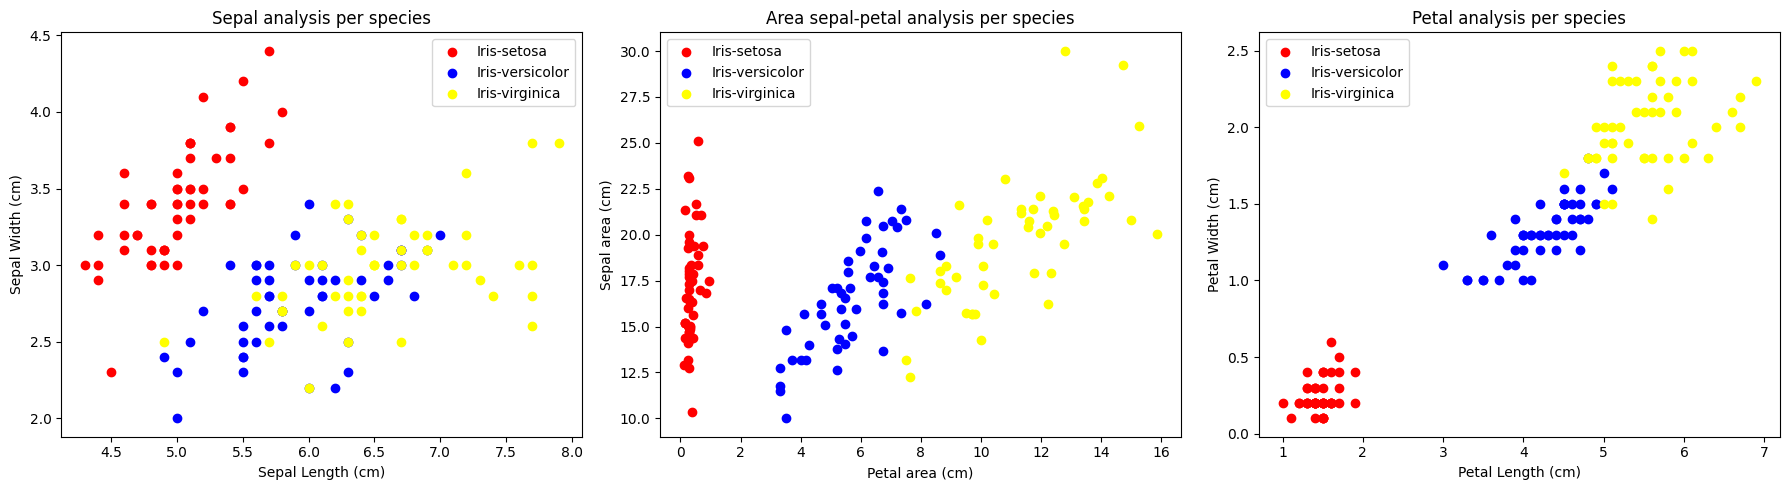

In [25]:
class IrisVisualizer: 
    def __init__(self, df, err=None):
        self.df = df
        self.error = err        # value with mismatching prediction 
        self.colors = {
            "Iris-setosa": "red",
            "Iris-versicolor": "blue",
            "Iris-virginica":"yellow"
        }
        self.species = df["Species"].unique()

    def plot_sepals(self, axes):
        # sepal area between species 
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["SepalLengthCm"], 
                row["SepalWidthCm"], 
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )
            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["SepalLengthCm"], 
                    row["SepalWidthCm"], 
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Sepal Length (cm)")
        axes.set_ylabel("Sepal Width (cm)")
        axes.set_title("Sepal analysis per species")
        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)

    def plot_petals(self, axes):
        # area petal-sepal analysis
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["PetalLengthCm"] * row["PetalWidthCm"], 
                row["SepalLengthCm"] * row["SepalWidthCm"],
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )

            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["PetalLengthCm"] * row["PetalWidthCm"], 
                    row["SepalLengthCm"] * row["SepalWidthCm"],
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Petal area (cm)")
        axes.set_ylabel("Sepal area (cm)")
        axes.set_title("Area sepal-petal analysis per species")
        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)

    def plot_area(self, axes):
        # petal area between species 
        for idx, row in self.df.iterrows():
            sp = row["Species"]
            color =  self.colors[sp] 
            # compiles till we plot
            axes.scatter(
                row["PetalLengthCm"], 
                row["PetalWidthCm"], 
                color=color,
                label=sp if self.df[self.df["Species"] == sp].index[0] == idx else ""
            )
            if self.error is not None and idx in self.error:
                axes.scatter(
                    row["PetalLengthCm"], 
                    row["PetalWidthCm"],
                    facecolors='none',
                    edgecolors='black',
                    linewidths=1.5
                )
        axes.set_xlabel("Petal Length (cm)")
        axes.set_ylabel("Petal Width (cm)")
        axes.set_title("Petal analysis per species")

        handles, labels = self.error_marker(axes)
        axes.legend(handles, labels)


    def error_marker(self, axes):
        handles, labels = axes.get_legend_handles_labels()
        if self.error is not None:
            # add custom legend for errors
            error_marker = mlines.Line2D([], [], color='black', marker='o', 
                                        markersize=8, linestyle='None',
                                        markerfacecolor='none', label='Wrong guess')
            handles.append(error_marker)
            labels.append("Wrong guess")
        return handles, labels

def plot_predictions(df, err):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    viz = IrisVisualizer(df, err)
    viz.plot_sepals(axes[0])
    viz.plot_petals(axes[1])
    viz.plot_area(axes[2])
    plt.tight_layout()
    plt.show()

# Create a figure with 3 side-by-side axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

viz = IrisVisualizer(iris_df)
viz.plot_sepals(axes[0])
viz.plot_petals(axes[1])
viz.plot_area(axes[2])

plt.tight_layout()
plt.show()

### **Helper function** 

In [ ]:
def clean_data():
    # extracting paramters 
    # Drop the label column (Species)
    X = iris_df.drop(columns=["Species", "Id"]).values

    # Grab the label column separately
    y = iris_df["Species"]

    # Process category in numerical format (easy way -> y = iris_df["Species"].astype('category').cat.codes.values)
    label = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica":2
    }

    Y = y.map(label).values

    # seperate testing and training data 
    N = len(iris_df)
    indices = np.arange(N)
    np.random.shuffle(indices)
    
    split = int(N * .8)
    
    train_idx = indices[:split]
    test_idx = indices[split:]

    Xtrain = X[train_idx]
    Xtest = X[test_idx]
    Ytrain = Y[train_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx


### **Baseline & Simple Models**
1. Logistic regression
    - Vanilla python

[ 71  89 107  79  14 104  42   4  37 149  97 137  27  87  31 131  73  28
  16 103 111 145  33 112  29 119 106  34  99  43 129 147  57  17 123  40
  41 117  81  86 130  36   1  55 121 101   8 139 140  61 125  44 102  91
  93 136 114 126 148  75 108 118  76  84  94  80 113  53  50 120  66 143
  45  13 100  69  19  95   7  65  60  11  62   9  20  96  30 128 110 124
  90  48  12  18 115  88  51 132  32   6  92 135  26 144  10  56  22  98
  77  59 134 141  47  46  68 109  85  38  49  72]
[[6.1 2.8 4.  1.3]
 [5.5 2.5 4.  1.3]
 [7.3 2.9 6.3 1.8]
 [5.7 2.6 3.5 1. ]
 [5.8 4.  1.2 0.2]
 [6.5 3.  5.8 2.2]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.9 3.  5.1 1.8]
 [6.2 2.9 4.3 1.3]
 [6.4 3.1 5.5 1.8]
 [5.2 3.5 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [5.4 3.4 1.5 0.4]
 [7.9 3.8 6.4 2. ]
 [6.1 2.8 4.7 1.2]
 [5.2 3.4 1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [6.3 2.9 5.6 1.8]
 [6.4 2.7 5.3 1.9]
 [6.7 3.  5.2 2.3]
 [5.5 4.2 1.4 0.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.9 2.5 4.5 1.7]

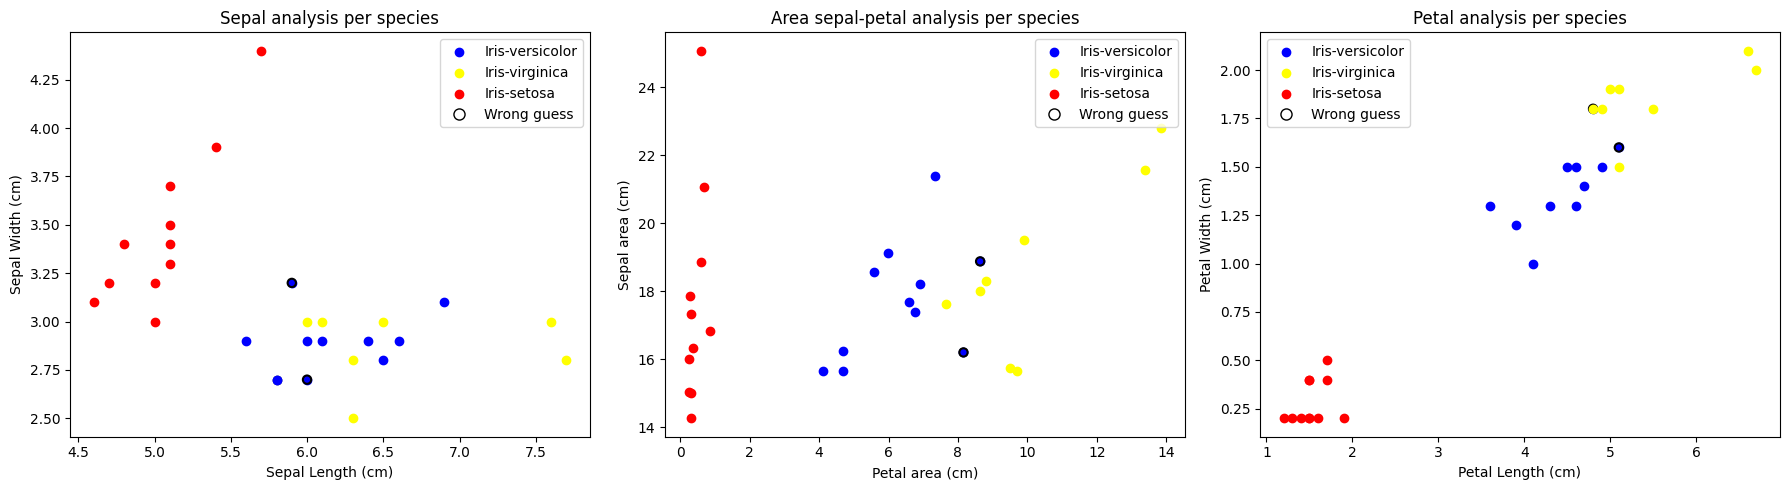

In [27]:
def softmax(logits):
    """
    logits: shape (N, K)
    returns: probabilities, shape (N, K)
    What to do:
    - Apply the softmax equation to each row
    - Use max subtraction for numerical stability
    """
    # case 1: 1 sample -> for prediction 
    if logits.ndim == 1:
        logits = logits - np.max(logits)
        exp_logits = np.exp(logits)
        return exp_logits / np.sum(exp_logits)
    # case 2: batch (n,k) 
    else:
        logits = logits - np.max(logits, axis=1, keepdims=True)
        exp_logits = np.exp(logits)
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


def cross_entropy_loss(probs, y_true):
    """
    probs: predicted probabilities (N, K)
    y_true: correct labels (N,) — each is class index 0..K-1
    returns: scalar loss
    What to do:
    - Pick the predicted prob for the correct class for each sample
    - Take the negative log
    - Average over N
    """
    N = len(probs)

    # grabbing true probability 
    correct_prob = probs[np.arange(N), y_true]

    # calculate the log loss of each probability 
    negative_logs = -np.log(correct_prob)

    # calculate the batch loss
    average_loss = np.mean(negative_logs)

    return average_loss
    


def forward(X, W, b):
    """
    X: input data (N, D)
    W: weights (D, K)
    b: biases (K,)
    returns: logits (N, K)
    What to do:
    - Compute XW + b
    """
    return X @ W + b  


def backward(X, probs, y_true):
    """
    X: (N, D)
    probs: (N, K)
    y_true: (N,)
    returns: gradients dW, db
    What to do:
    - Convert y_true into one-hot
    - Compute derivative of loss w.r.t. logits
    - Get dW and db
    """
    N = np.shape(X)[0]
    K = np.shape(probs)[1]
    encoded_y_true = np.zeros((N, K))
    encoded_y_true[np.arange(N), y_true] = 1

    dJ_dW = (1/N) * np.matmul(np.transpose(X), probs - encoded_y_true )
    dL_db = (1/N) * np.sum(probs - encoded_y_true, axis=0)

    return  dJ_dW, dL_db

def train(X, Y, lr=0.1, epochs=200):
    """
    Train loop:
    - Initialize W, b
    - For each epoch:
        - Forward pass → logits → softmax
        - Compute loss
        - Backward pass → gradients
        - Update W, b with gradient descent
    - Return trained W, b
    """

    # initialize weight and biases
    w = np.zeros((np.shape(X)[1], 3)) # 1x4 feature * 4 (len of x) x 3 (output)
    b = np.zeros(3,) 

    for epoch in range(epochs): 
        logits =  forward(X, w, b)      # returns z
        probability = softmax(logits)   # computes the probability 

        loss = cross_entropy_loss(probability, Y)
        dw , db = backward(X, probability, Y)
        
        w -= dw * lr
        b -= db * lr

        if epoch % 10 == 0:
            pass
            # print(f"i:{epoch} current loss: {loss:.2f}")
    return w, b 

def predict(X,W,b):
    logits = forward(X, W, b)
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

def evaluate(X,Y,W,b, df, test_idx):
    predicted_value = predict(X,W,b)
    matches = predicted_value == Y

    species =np.array(["Iris-setosa",
        "Iris-versicolor",
        "Iris-virginica"])

    unique_elements, counts = np.unique(matches, return_counts=True)

    for element, count in zip(unique_elements, counts):
        print(f"{element}, Count: {count}")
    
    wrong_label = np.where(matches == False)[0]
    df_idx = test_idx[wrong_label]
    print(f"Training accuracy {np.mean(matches):.2f}")
    print(f"inaccuracy: {X[wrong_label]} -> {df_idx}\npredicted: {species[predicted_value[wrong_label]]}\ntrue value: {species[Y[wrong_label]]}")
    df = df.iloc[test_idx]
    plot_predictions(df, df_idx)

    

Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx  = clean_data()

# get weight and bias for prediction 
w, b = train(Xtrain, Ytrain)
evaluate(Xtest, Ytest,w,b, iris_df, test_idx)

### __KNN prediction__
#### Vanilla python 

In [65]:
class Knn_iris_classification():
    def __init__(self, Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx):
        self.Xtrain = Xtrain
        self.Xtest=Xtest
        self.Ytrain=Ytrain
        self.Ytest=Ytest
        self.train_idx=train_idx
        self.test_idx=test_idx
        self.species_list = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    
    def euclidean(self, f1, f2):
        delta_f1 = f1[None, : ,: ]
        delta_f2 = f2[:, None ,: ]
        return np.linalg.norm(delta_f1 - delta_f2,  axis=2)
    
    def classify(self):
        sample = self.Xtest
        neighbor = self.Xtrain

        x = self.euclidean(sample, neighbor)

        print(x)
        # zipped = list(zip(x.flatten(), np.arange(len(neighbor))))
        # zipped.sort(key=lambda tup: tup[0])
        # sliced = zipped[:5]

        # decision = [Ytrain[idx] for _, idx in sliced]      #returns the top 5 closest neighboor 

        # species = Counter(decision).most_common()         calls the list of all unique elements 
        # species = Counter(decision).most_common(1)        returns the first elementinside the list  (not a zero based indexed)
        # species = Counter(decision).most_common(1)[0]     returns the first elemnt in the list 

        # species = Counter(decision).most_common(1)[0][0]   #returns the value with the highest count data struct -> (value, count)

        # print(f"for sample {train_idx[0]}: {sample}-{self.species_list[0]} prediction ->  {self.species_list[species]} ")


Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx  = clean_data()
knn = Knn_iris_classification(Xtrain, Xtest, Ytrain, Ytest, train_idx, test_idx)
knn.classify()


# arr1 = np.array([[5.7, 4.4, 1.5, 0.4],
#     [6.2, 2.9, 4.3, 1.3],
#     [6.7, 3.3, 5.7, 2.5],
#     [6.3, 2.5, 5.,  1.9],
#     [6.3, 3.3, 4.7, 1.6],
#     [5.2, 3.4, 1.4, 0.2],
#     [7.7, 2.8, 6.7, 2. ]
# ])   # shape (3, 3)
# arr2 = np.array([[6.7, 3.1, 5.6, 2.4],
#     [6.1, 2.6, 5.6, 1.4],
#     [6.3, 2.7, 4.9, 1.8]])           # shape (2, 3)

# # Add new axes to enable broadcasting:
# # arr1 -> (1, 3, 3)
# # arr2 -> (2, 1, 3)
# delta1 = arr1[None, :, :]
# delta2 = arr2[:, None, :] 

# diff = delta2 - delta1   # shape (2, 3, 3)
# # print(delta1)
# print(np.shape(delta1))
# # print(delta2)
# print(np.shape(delta2))

# # Euclidean distance along last axis
# dist_matrix = np.linalg.norm(diff, axis=2)   # shape (2, 3)
# print(np.shape(dist_matrix))
# print(dist_matrix)


[ 93  78   9  40  95  53  88  66  23  38 135 145  10  45  29   6 108 125
 117 120  75  92 131  46 106  19  35 115  73  28 142  21  34 148  13  14
  79 129  37  98 130 122  63  51  16  31 126  47  48  94 123  20  80 146
  43 110 121 149  85  68 128  22 102 132 138   4 144 112 118  56  42  62
 134  30  32 136 141 100  82  87  89 111  77  49  17  12  76 116  64  70
 133  86  27  61  71  18  69 114  90   2 143  57   0  52 107   7  11 105
  39  83 139  26  65  91  74 127  41  54  96  24]
[[5.  2.3 3.3 1. ]
 [6.  2.9 4.5 1.5]
 [4.9 3.1 1.5 0.1]
 [5.  3.5 1.3 0.3]
 [5.7 3.  4.2 1.2]
 [5.5 2.3 4.  1.3]
 [5.6 3.  4.1 1.3]
 [5.6 3.  4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [4.4 3.  1.3 0.2]
 [7.7 3.  6.1 2.3]
 [6.7 3.  5.2 2.3]
 [5.4 3.7 1.5 0.2]
 [4.8 3.  1.4 0.3]
 [4.7 3.2 1.6 0.2]
 [4.6 3.4 1.4 0.3]
 [6.7 2.5 5.8 1.8]
 [7.2 3.2 6.  1.8]
 [7.7 3.8 6.7 2.2]
 [6.9 3.2 5.7 2.3]
 [6.6 3.  4.4 1.4]
 [5.8 2.6 4.  1.2]
 [7.9 3.8 6.4 2. ]
 [5.1 3.8 1.6 0.2]
 [4.9 2.5 4.5 1.7]
 [5.1 3.8 1.5 0.3]
 [5.  3.2 1.2 0.2]